In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

<div style='text-align: center;'>

# Performing various experiments to understand Gradient Descent (GD)

</div>

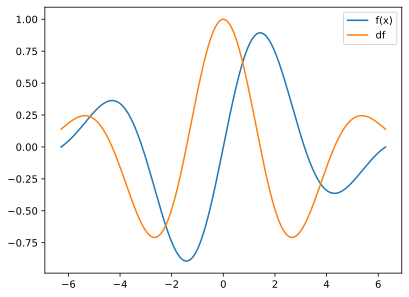

In [5]:
# setting up the function and it's derivative 
x = np.linspace(-2*np.pi,2*np.pi,401)
fx = np.sin(x) * np.exp(-x**2*.05)
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05)

# plotting
plt.plot(x,fx,x,df)
plt.legend(['f(x)','df'])
plt.show()

In [6]:
# creating functions
def fx(x):
    return np.sin(x) * np.exp(-x**2*.05)

def deriv(x):
    return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.5)

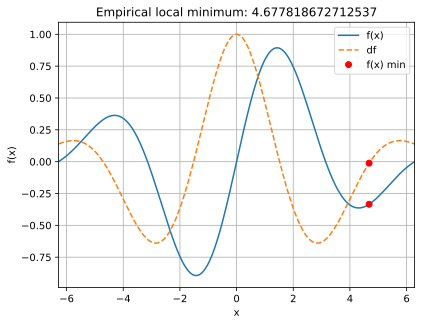

In [7]:
# selecting random starting point
localMin = np.random.choice(x,1)

# setting up learning parameters
learning_rate = .01
training_epochs = 1000

# iterate through training
for i in range(training_epochs):
    gradient = deriv(localMin)
    localMin = localMin - learning_rate*gradient

# plotting the results
plt.plot(x,fx(x),x,deriv(x),'--')
plt.plot(localMin,deriv(localMin),'ro')
plt.plot(localMin,fx(localMin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localMin[0])
plt.show()

<div style='text-align: center;'>

# Starting parametric experiments


</div>

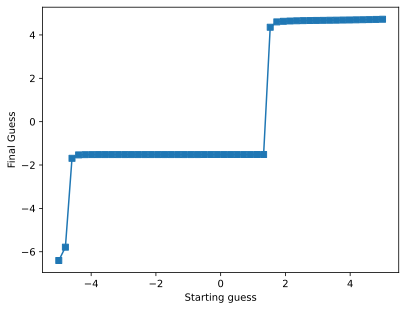

In [9]:
# EXP 1: systematically vary the starting points
startLocations = np.linspace(-5,5,50)
finalResult = np.zeros(len(startLocations))

# loop over starting points
for index, localMin in enumerate(startLocations):
    # iterate through training
    for i in range(training_epochs):
        gradient = deriv(localMin)
        localMin = localMin - learning_rate*gradient
    
    # store final guess for each different start point
    finalResult[index] = localMin

# plot the results
plt.plot(startLocations, finalResult,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final Guess')
plt.show()

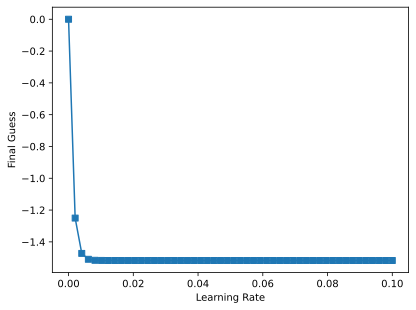

In [10]:
# EXP 2: systematically vary the learning rate
learning_rates = np.linspace(1e-10,1e-1,50)
finalResult = np.zeros(len(learning_rates))

training_epochs = 1000

# loop over the learning rates
for index, learning_rate in enumerate(learning_rates):
    
    # force starting guess to 0
    localMin = 0

    # iterate through training
    for i in range(training_epochs):
        gradient = deriv(localMin)
        localMin = localMin - learning_rate*gradient

    finalResult[index] = localMin

plt.plot(learning_rates,finalResult,'s-')
plt.xlabel('Learning Rate')
plt.ylabel('Final Guess')
plt.show()

In [29]:
# EXP 3: showing the interaction between learning rate and training epochs

# setup parameters 
learning_rates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
finalResult = np.zeros((len(learning_rates),len(training_epochs)))

# loop over learning rates 
for LearningIDX, learningRate in enumerate(learning_rates):

    # loop over training epochs
    for EpochIDX, trainingEpoch in enumerate(training_epochs):

        # force starting guess to 0
        localMin = 0

        # iterate through training
        for i in range(int(trainingEpoch)):
            gradient = deriv(localMin)
            localMin = localMin - learningRate*gradient

        finalResult[LearningIDX,EpochIDX] = localMin
            

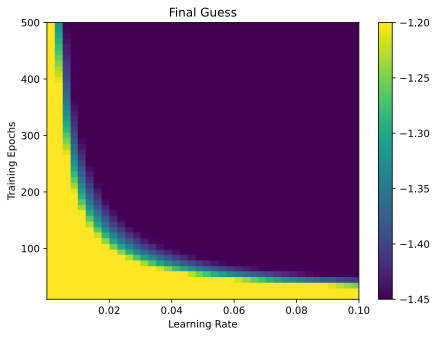

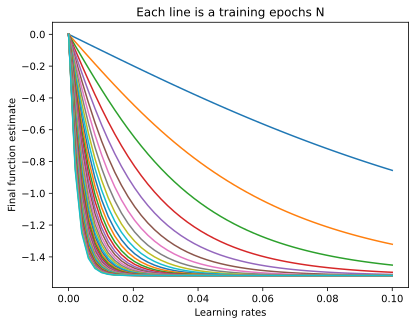

In [30]:
# plotting the results
fix,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalResult, extent=[learning_rates[0],learning_rates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)

plt.xlabel('Learning Rate')
plt.ylabel('Training Epochs')
plt.title('Final Guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learning_rates,finalResult)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()